In [6]:
%load_ext autoreload
%autoreload 1
#from support import *
%aimport support
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:

# date_path = datetime.now().strftime("%Y/%m/%d/")  # Dynamické generování cesty podle aktuálního data
date_path = "2024/03/20/"
base_url = f"http://space.astro.cz/meteo/meteobox/meteobox_01/{date_path}"
print(base_url)  # Vypíše URL adresu, která bude použita pro stažení CSV souborů

csv_urls = support.fetch_csv_urls(base_url)
print(csv_urls)  # Vypíše seznam URL adres CSV souborů, které budou staženy a sloučeny

combined_df = support.download_and_combine_csv(csv_urls)
print(combined_df.head())  # Zobrazí prvních několik řádků sloučené DataFrame
# combined_df.to_csv("combined_data.csv", index=False)  # Volitelně uložit do souboru

http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/
['http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-000001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-001001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-002001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-003001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-004001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-005001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-010001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-011001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/20/METEOBOX_export_20240320-012001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_

                         _time     _value _field   dataId
0     2024-03-19T23:50:06.221Z  65.856413    hum  HYGRO01
1  2024-03-19T23:50:11.492655Z  65.774014    hum  HYGRO01
2  2024-03-19T23:50:16.733393Z  65.737392    hum  HYGRO01
3  2024-03-19T23:50:21.976044Z  65.661097    hum  HYGRO01
4   2024-03-19T23:50:27.21676Z  65.586328    hum  HYGRO01


In [84]:
resampled_df

,_time,_value,_field,dataId
0,2024-03-20 23:50:00+00:00,76.601173,hum,HYGRO01
1,2024-03-21 00:00:00+00:00,77.762184,hum,HYGRO01
2,2024-03-21 00:10:00+00:00,76.732963,hum,HYGRO01
3,2024-03-21 00:20:00+00:00,75.925466,hum,HYGRO01
4,2024-03-21 00:30:00+00:00,77.415891,hum,HYGRO01
...,...,...,...,...
2435,2024-03-21 09:10:00+00:00,0.535575,tps,SPS30_2
2436,2024-03-21 09:20:00+00:00,0.535808,tps,SPS30_2
2437,2024-03-21 09:30:00+00:00,0.541384,tps,SPS30_2
2438,2024-03-21 09:40:00+00:00,0.532319,tps,SPS30_2


In [85]:
# Resample data for each sensor
resampled_data = []
unique_combinations = combined_df[['dataId', '_field']].drop_duplicates()
print(unique_combinations)
# Resample data for each sensor
resampled_data = []
for index, row in unique_combinations.iterrows():
    sensor = row['dataId']
    field = row['_field']
    sensor_data = combined_df[(combined_df['dataId'] == sensor) & (combined_df['_field'] == field)]
    # Convert _time to datetime
    sensor_data.loc[:, '_time'] = pd.to_datetime(sensor_data['_time'])
    resampled = sensor_data.resample('10T', on='_time').agg({'_value': 'mean', '_field': 'first'})
    resampled['dataId'] = sensor
    resampled_data.append(resampled)

# Combine all resampled data
resampled_df = pd.concat(resampled_data)

# Reset index
resampled_df.reset_index(inplace=True)

print(resampled_df)


        dataId        _field
0      HYGRO01           hum
114    HYGRO01          temp
228    HYGRO02           hum
342    HYGRO02          temp
456      SEN54           hum
902      SEN54      mass_pm1
1348     SEN54     mass_pm10
1794     SEN54    mass_pm2-5
2240     SEN54      mass_pm4
2686     SEN54           nox
3132     SEN54          temp
3578     SEN54           voc
4024   SEN54_2           hum
4470   SEN54_2      mass_pm1
4916   SEN54_2     mass_pm10
5362   SEN54_2    mass_pm2-5
5808   SEN54_2      mass_pm4
6254   SEN54_2           nox
6700   SEN54_2          temp
7146   SEN54_2           voc
7592     SPS30      mass_pm1
8115     SPS30     mass_pm10
8638     SPS30    mass_pm2-5
9161     SPS30      mass_pm4
9684     SPS30  number_pm0-5
10207    SPS30    number_pm1
10730    SPS30   number_pm10
11253    SPS30  number_pm2-5
11776    SPS30    number_pm4
12299    SPS30           tps
12822  SPS30_2      mass_pm1
13345  SPS30_2     mass_pm10
13868  SPS30_2    mass_pm2-5
14391  SPS30_2

In [86]:
resampled_df['_field'].unique()

array(['hum', 'temp', 'mass_pm1', 'mass_pm10', 'mass_pm2-5', 'mass_pm4',
       'nox', 'voc', 'number_pm0-5', 'number_pm1', 'number_pm10',
       'number_pm2-5', 'number_pm4', 'tps'], dtype=object)

In [87]:
resampled_df

,_time,_value,_field,dataId
0,2024-03-19 23:50:00+00:00,66.022147,hum,HYGRO01
1,2024-03-20 00:00:00+00:00,66.713970,hum,HYGRO01
2,2024-03-20 00:10:00+00:00,67.116928,hum,HYGRO01
3,2024-03-20 00:20:00+00:00,69.259043,hum,HYGRO01
4,2024-03-20 00:30:00+00:00,68.897616,hum,HYGRO01
...,...,...,...,...
5791,2024-03-20 23:10:00+00:00,0.564599,tps,SPS30_2
5792,2024-03-20 23:20:00+00:00,0.561771,tps,SPS30_2
5793,2024-03-20 23:30:00+00:00,0.563662,tps,SPS30_2
5794,2024-03-20 23:40:00+00:00,0.557861,tps,SPS30_2


In [88]:

unique_temp_sensors = resampled_df[resampled_df['_field'] == 'temp']['dataId'].unique()
unique_humidity_sensors = resampled_df[resampled_df['_field'] == 'hum']['dataId'].unique()

print(unique_temp_sensors)
print(unique_humidity_sensors)

['HYGRO01' 'HYGRO02' 'SEN54' 'SEN54_2']
['HYGRO01' 'HYGRO02' 'SEN54' 'SEN54_2']


HYGRO01
HYGRO02
SEN54
SEN54_2
HYGRO01
HYGRO02
SEN54
SEN54_2


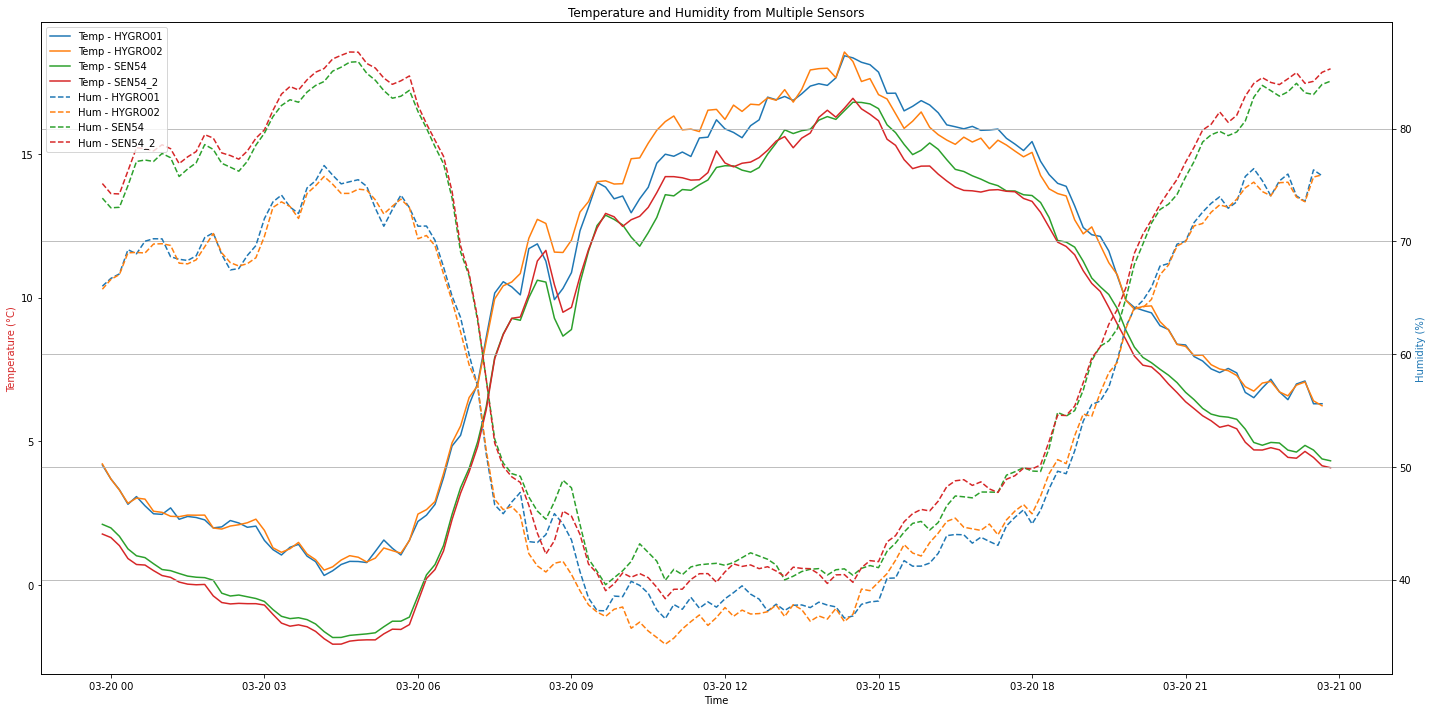

In [112]:
from matplotlib.dates import DateFormatter
import mpld3
# Extract unique sensors for temperature and humidity
unique_temp_sensors = resampled_df[resampled_df['_field'] == 'temp']['dataId'].unique()
unique_humidity_sensors = resampled_df[resampled_df['_field'] == 'hum']['dataId'].unique()

# Prepare data for temperature and humidity
temperature_data = resampled_df[resampled_df['_field'] == 'temp']
humidity_data = resampled_df[resampled_df['_field'] == 'hum']

# Plotting all sensor data on a single plot for comparison
fig, ax1 = plt.subplots(figsize=(20, 10))

# Temperature data
for sensor in unique_temp_sensors:
    print(sensor)
    sensor_data = temperature_data[temperature_data['dataId'] == sensor]
    ax1.plot(sensor_data['_time'], sensor_data['_value'], label=f'Temp - {sensor}')

# Humidity data
ax2 = ax1.twinx()
for sensor in unique_humidity_sensors:
    print(sensor)
    sensor_data = humidity_data[humidity_data['dataId'] == sensor]
    ax2.plot(sensor_data['_time'], sensor_data['_value'], linestyle='--', label=f'Hum - {sensor}')

# Labels, titles, and legend
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax2.set_ylabel('Humidity (%)', color='tab:blue')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Temperature and Humidity from Multiple Sensors')
plt.tight_layout()
plt.grid(True, 'both', 'both', linestyle='--', alpha=0.5)

plt.savefig("plot.png")
mpld3.save_html(fig, "interactive_plot.html")

plt.show()


In [101]:

# Pivot the DataFrame
pivot_df = resampled_df.pivot_table(index='_time', columns=['dataId', '_field'], values='_value')
pivot_df.columns = pivot_df.columns.map('_'.join)

# Reset the index
pivot_df.reset_index(inplace=True)
print(pivot_df)

                        _time  HYGRO01_hum  HYGRO01_temp  HYGRO02_hum  \
0   2024-03-19 23:50:00+00:00    66.022147      4.178860    65.754378   
1   2024-03-20 00:00:00+00:00    66.713970      3.694055    66.620729   
2   2024-03-20 00:10:00+00:00    67.116928      3.319460    67.055303   
3   2024-03-20 00:20:00+00:00    69.259043      2.813320    68.982210   
4   2024-03-20 00:30:00+00:00    68.897616      3.081051    69.020063   
..                        ...          ...           ...          ...   
140 2024-03-20 23:10:00+00:00    74.034718      6.996713    73.929364   
141 2024-03-20 23:20:00+00:00    73.548673      7.100856    73.515116   
142 2024-03-20 23:30:00+00:00    76.340605      6.308869    75.703662   
143 2024-03-20 23:40:00+00:00    75.818497      6.309974    75.898600   
144 2024-03-20 23:50:00+00:00          NaN           NaN          NaN   

     HYGRO02_temp  SEN54_hum  SEN54_mass_pm1  SEN54_mass_pm10  \
0        4.215987  73.832067       23.272809        30.971

In [103]:
print(pivot_df.columns)
pivot_df.to_csv("combined_data_{}.csv".format(date_path.replace('/', '_')), index=True)

Index(['_time', 'HYGRO01_hum', 'HYGRO01_temp', 'HYGRO02_hum', 'HYGRO02_temp',
       'SEN54_hum', 'SEN54_mass_pm1', 'SEN54_mass_pm10', 'SEN54_mass_pm2-5',
       'SEN54_mass_pm4', 'SEN54_nox', 'SEN54_temp', 'SEN54_voc', 'SEN54_2_hum',
       'SEN54_2_mass_pm1', 'SEN54_2_mass_pm10', 'SEN54_2_mass_pm2-5',
       'SEN54_2_mass_pm4', 'SEN54_2_nox', 'SEN54_2_temp', 'SEN54_2_voc',
       'SPS30_mass_pm1', 'SPS30_mass_pm10', 'SPS30_mass_pm2-5',
       'SPS30_mass_pm4', 'SPS30_number_pm0-5', 'SPS30_number_pm1',
       'SPS30_number_pm10', 'SPS30_number_pm2-5', 'SPS30_number_pm4',
       'SPS30_tps', 'SPS30_2_mass_pm1', 'SPS30_2_mass_pm10',
       'SPS30_2_mass_pm2-5', 'SPS30_2_mass_pm4', 'SPS30_2_number_pm0-5',
       'SPS30_2_number_pm1', 'SPS30_2_number_pm10', 'SPS30_2_number_pm2-5',
       'SPS30_2_number_pm4', 'SPS30_2_tps'],
      dtype='object')
